In [1]:
import numpy as np
import sklearn
import os
import random
import math

from tqdm import tqdm
from scipy.io import loadmat

np.random.seed(1)


In [5]:
def append_one(X):
    n = len(X)
    ones = np.zeros((n, 1)) + 1
    X_new = np.concatenate([ones, X], axis= 1)
    return X_new


In [6]:
def Kernel_input(x1, x2):
    numerator    = 2*np.dot(np.dot(x1, Sigma_u), x2 )
    denominator1 = 1 + 2*np.dot(np.dot(x1, Sigma_u), x1 )
    denominator2 = 1 + 2*np.dot(np.dot(x2, Sigma_u), x2 )
    denominator  = math.sqrt(denominator1*denominator2)                           # See "Computing with infinite networks" for calculation of Expectation term 
    
    Expectation_term = (2/np.pi) * math.asin( numerator/denominator )
    similarity       = C_term +  Expectation_term                                 # See "Multitask Neural networks meet Multitask Gaussian Process" Paper for notation of C-term and Expectation term
    return similarity 

In [122]:
X_temp = np.linspace(-10, 10, 151)
X_temp = X_temp.reshape((151, 1))
X      = append_one(X_temp)


# Hyperparemeters to Sample

In [143]:
Sigma_u = (1e+2)*np.identity(2)
C_term  = 1

sample_mean = np.zeros(len(X))
sample_var = np.zeros((len(X), len(X)))


for i in range(0, len(X)):
    for j in range(0, len(X)):
        sample_var[i, j] = Kernel_input(X[i] , X[j])

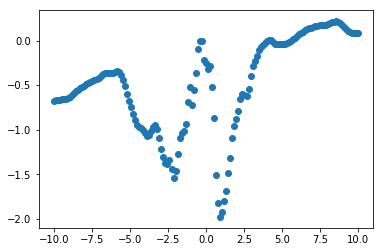

In [153]:
Y = np.random.multivariate_normal(sample_mean, sample_var)
Y.shape

import matplotlib.pyplot as plt

plt.scatter(X[:, 1], Y)
plt.show()

In [154]:
data = {
    "X" : X,
    "Y" : Y
}

In [157]:
import pickle
pickle.dump(data, open("adaptive_data1.pickle", 'wb'))